# Inference for numerical data

In [5]:
library(statsr)
library(dplyr)
library(ggplot2)
library(Hmisc)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:dplyr’:

    src, summarize

The following objects are masked from ‘package:base’:

    format.pval, units



In [6]:
data(nc)

In [7]:
describe(nc)

nc 

 13  Variables      1000  Observations
--------------------------------------------------------------------------------
fage 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     829      171       37    0.998    30.26    7.673       20       21 
     .25      .50      .75      .90      .95 
      25       30       35       39       42 

lowest : 14 16 17 18 19, highest: 47 48 50 53 55
--------------------------------------------------------------------------------
mage 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1000        0       33    0.998       27    7.103       18       19 
     .25      .50      .75      .90      .95 
      22       27       32       35       37 

lowest : 13 14 15 16 17, highest: 41 42 45 46 50
--------------------------------------------------------------------------------
mature 
       n  missing distinct 
    1000        0        2 
                                  
Value       mature mom you

In [8]:
str(nc)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1000 obs. of  13 variables:
 $ fage          : int  NA NA 19 21 NA NA 18 17 NA 20 ...
 $ mage          : int  13 14 15 15 15 15 15 15 16 16 ...
 $ mature        : Factor w/ 2 levels "mature mom","younger mom": 2 2 2 2 2 2 2 2 2 2 ...
 $ weeks         : int  39 42 37 41 39 38 37 35 38 37 ...
 $ premie        : Factor w/ 2 levels "full term","premie": 1 1 1 1 1 1 1 2 1 1 ...
 $ visits        : int  10 15 11 6 9 19 12 5 9 13 ...
 $ marital       : Factor w/ 2 levels "married","not married": 1 1 1 1 1 1 1 1 1 1 ...
 $ gained        : int  38 20 38 34 27 22 76 15 NA 52 ...
 $ weight        : num  7.63 7.88 6.63 8 6.38 5.38 8.44 4.69 8.81 6.94 ...
 $ lowbirthweight: Factor w/ 2 levels "low","not low": 2 2 2 2 2 1 2 1 2 2 ...
 $ gender        : Factor w/ 2 levels "female","male": 2 2 1 2 1 2 2 2 2 1 ...
 $ habit         : Factor w/ 2 levels "nonsmoker","smoker": 1 1 1 1 1 1 1 1 1 1 ...
 $ whitemom      : Factor w/ 2 levels "not white","white": 1 1 2 2

In [9]:
summary(nc$gained)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   20.00   30.00   30.33   38.00   85.00      27 

# Q: How many mothers are we missing weight gain data from?

# A: 27

# Q: Make side-by-side boxplots of habit and weight. Which of the following is false about the relationship between habit and weight?

- Median birth weight of babies born to non-smoker mothers is slightly higher than that of babies born to smoker mothers.
- Range of birth weights of babies born to non-smoker mothers is greater than that of babies born to smoker mothers.
- Both distributions are extremely right skewed.
- The IQRs of the distributions are roughly equal.

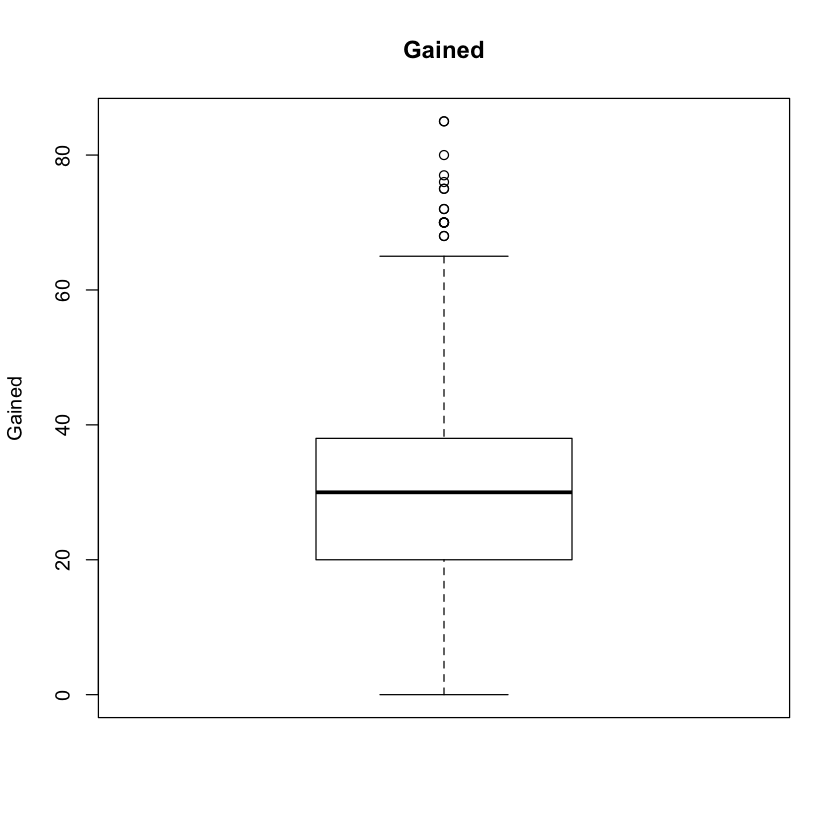

In [12]:
boxplot(
    nc$gained,
    data=nc,
    main="Gained", 
    ylab="Gained"
)

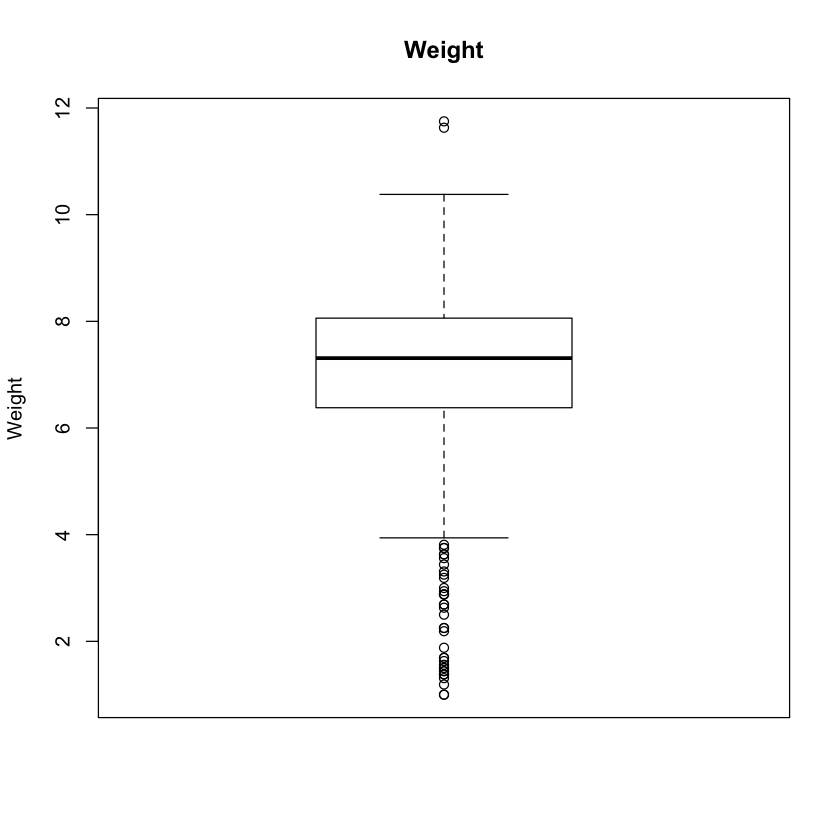

In [13]:
boxplot(
    nc$weight,
    data=nc,
    main="Weight", 
    ylab="Weight"
)

In [27]:
smoker_data <- nc %>%
  filter(habit == "smoker")

nonsmoker_data <- nc %>%
  filter(habit == "nonsmoker")

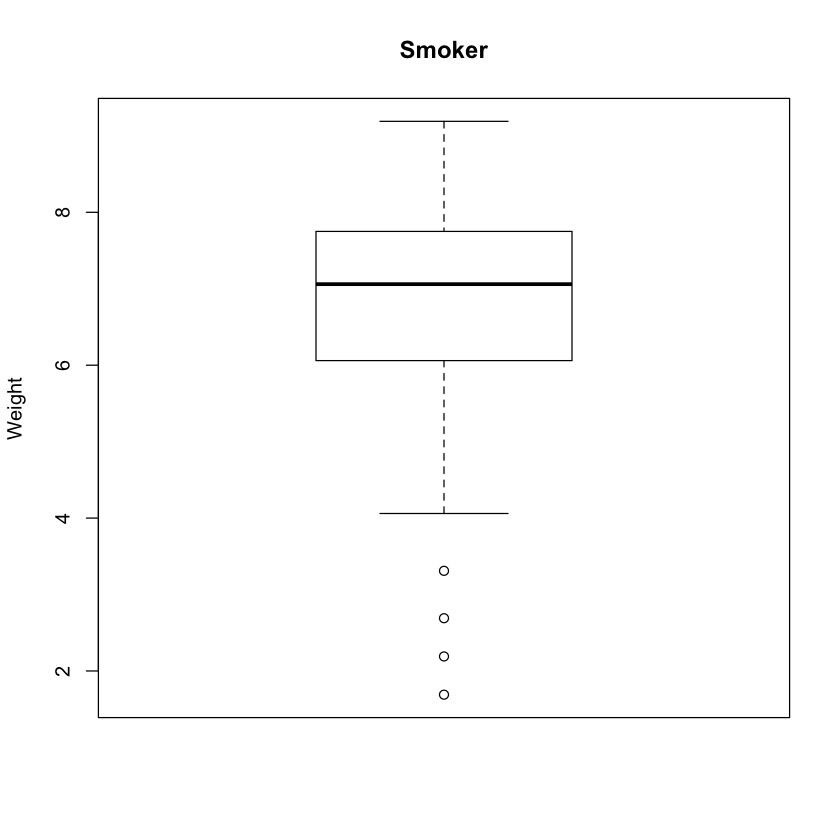

In [31]:
boxplot(
    smoker_data$weight,
    data=smoker_data,
    main="Smoker", 
    ylab="Weight"
)

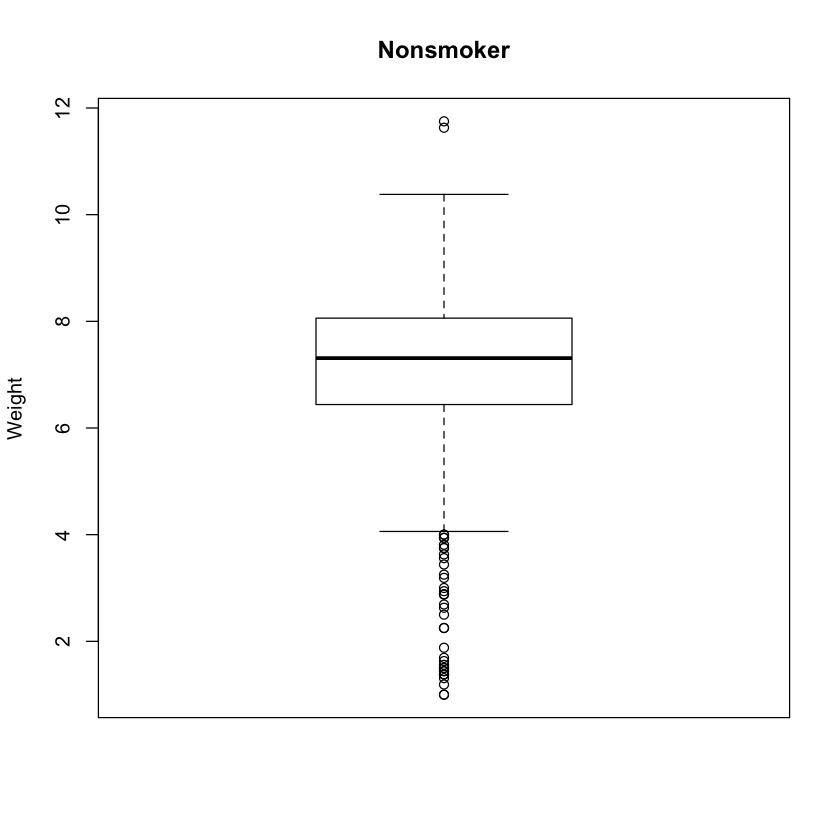

In [30]:
boxplot(
    nonsmoker_data$weight,
    data=nonsmoker_data,
    main="Nonsmoker", 
    ylab="Weight"
)

# A: The following is *False* - Both distributions are extremely right skewed.

# Q: Are all conditions necessary for inference satisfied? Comment on each. You can compute the group sizes using the same by command above but replacing mean(weight) with n().

# A: TODO - go in depth over the conditions necessary for inference

http://iimk.ac.in/gsdl/cgi-bin/library?e=d-000-00---0statis--00-0-0--0prompt-10---4------0-1l--1-en-50---20-about---00031-001-1-0utfZz-8-00&cl=CL2&d=HASH01b83486495333971202c326.4&gt=1

# Q: What are the hypotheses for testing if the average weights of babies born to smoking and non-smoking mothers are different?
- H0:μsmoking=μnon−smoking
; HA:μsmoking>μnon−smoking
- H0:μsmoking=μnon−smoking
; HA:μsmoking≠μnon−smoking
- H0:x¯smoking=x¯non−smoking
; HA:x¯smoking>x¯non−smoking
- H0:x¯smoking=x¯non−smoking
; HA:x¯smoking>x¯non−smoking
- H0:μsmoking≠μnon−smoking
; HA:μsmoking=μnon−smoking

# A: $H_0 μ_{smoking} = μ_{nonsmoking};\\  H_A μ_{smoking} \neq μ_{nonsmoking}$

Response variable: numerical
Explanatory variable: categorical (2 levels) 
n_nonsmoker = 873, y_bar_nonsmoker = 7.1443, s_nonsmoker = 1.5187
n_smoker = 126, y_bar_smoker = 6.8287, s_smoker = 1.3862
H0: mu_nonsmoker =  mu_smoker
HA: mu_nonsmoker != mu_smoker
t = 2.359, df = 125
p_value = 0.0199

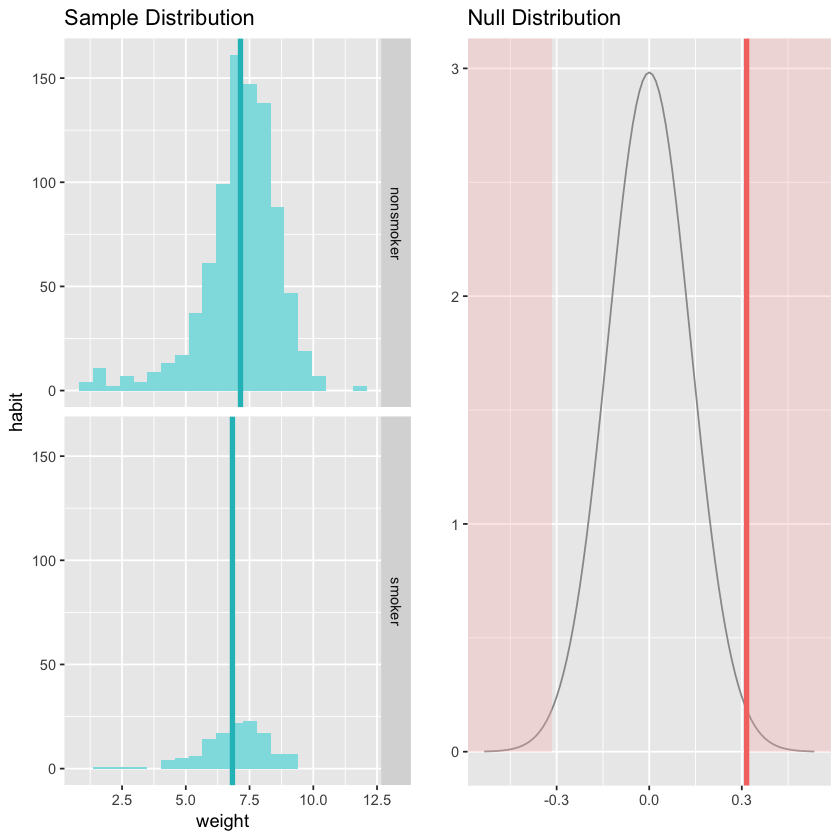

In [32]:
inference(
    y = weight,
    x = habit,
    data = nc,
    statistic = "mean",
    type = "ht",
    null = 0, 
    alternative = "twosided",
    method = "theoretical"
)

# Q: What is the conclusion of the hypothesis test?

# A: Since we have a p value <  `.0199`, it is unlikely that the null hypothesis is true, and we accept the alternative.

# Q: Change the type argument to "ci" to construct and record a confidence interval for the difference between the weights of babies born to nonsmoking and smoking mothers, and interpret this interval in context of the data. Note that by default you’ll get a 95% confidence interval. If you want to change the confidence level, add a new argument (conf_level) which takes on a value between 0 and 1. Also note that when doing a confidence interval arguments like null and alternative are not useful, so make sure to remove them.

- We are 95% confident that babies born to nonsmoker mothers are on average 0.05 to 0.58 pounds lighter at birth than babies born to smoker mothers.
- We are 95% confident that the difference in average weights of babies whose moms are smokers and nonsmokers is between 0.05 to 0.58 pounds.
- We are 95% confident that the difference in average weights of babies in this sample whose moms are smokers and nonsmokers is between 0.05 to 0.58 pounds.
- We are 95% confident that babies born to nonsmoker mothers are on average 0.05 to 0.58 pounds heavier at birth than babies born to smoker mothers.

Response variable: numerical, Explanatory variable: categorical (2 levels)
n_nonsmoker = 873, y_bar_nonsmoker = 7.1443, s_nonsmoker = 1.5187
n_smoker = 126, y_bar_smoker = 6.8287, s_smoker = 1.3862
95% CI (nonsmoker - smoker): (0.0508 , 0.5803)


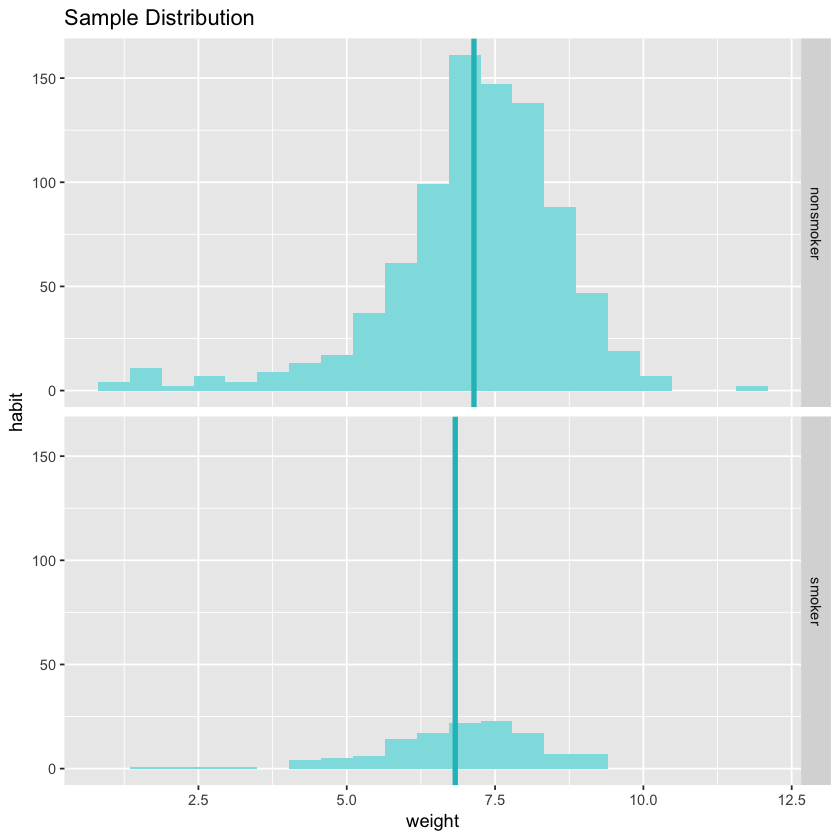

In [34]:
inference(
    y = weight,
    x = habit,
    data = nc,
    statistic = "mean",
    type = "ci",
    method = "theoretical"
)

# A: We are 95% confident that babies born to nonsmoker mothers are on average 0.05 to 0.58 pounds heavier at birth than babies born to smoker mothers.

Response variable: numerical, Explanatory variable: categorical (2 levels)
n_smoker = 126, y_bar_smoker = 6.8287, s_smoker = 1.3862
n_nonsmoker = 873, y_bar_nonsmoker = 7.1443, s_nonsmoker = 1.5187
95% CI (smoker - nonsmoker): (-0.5803 , -0.0508)


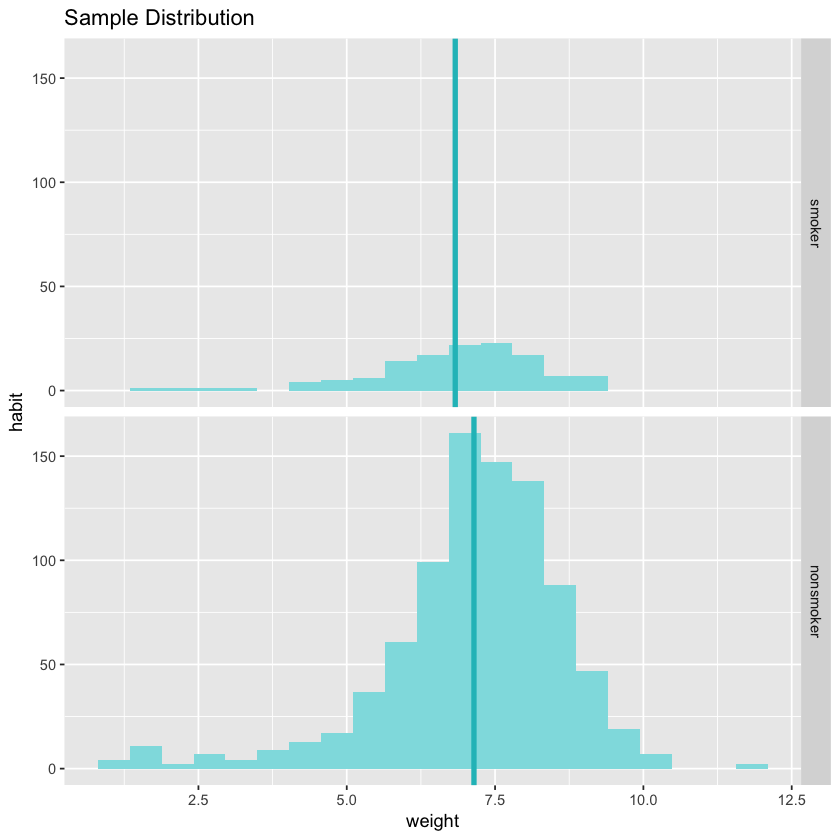

In [35]:
inference(y = weight, x = habit, data = nc, statistic = "mean", type = "ci", 
          method = "theoretical", order = c("smoker","nonsmoker"))

# Q: Calculate a 99% confidence interval for the average length of pregnancies (weeks). Note that since you’re doing inference on a single population parameter, there is no explanatory variable, so you can omit the x variable from the function. Which of the following is the correct interpretation of this interval?